In [1]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## 交通流動量 パーソントリップＯＤ量データ をDLする

### 三大都市圏パーソントリップ調査とは
https://www.tokyo-pt.jp/person/01

パーソントリップ調査は、「どのような人が」「どのような目的で」「どこからどこへ」「どのような交通手段で」移動したか


### 国土数値情報からDL

・　
・交通流動量 パーソントリップＯＤ量データ（東京圏）
http://nlftp.mlit.go.jp/ksj/jpgis/datalist/KsjTmplt-S05-b.html



In [2]:
# ファイルを読み込む
ｄｆ_personTripOD = gpd.read_file("../data/persontrip_syuto/S05-b-10_SYUTO-1-g_PersonTripODAmount.shp")
ｄｆ_personTripOD.head() 

,S05b_001,S05b_002,S05b_003,S05b_004,S05b_005,S05b_006,S05b_007,S05b_008,S05b_009,S05b_010,...,S05b_027,S05b_028,S05b_029,S05b_030,S05b_031,S05b_032,S05b_033,S05b_034,S05b_035,geometry
0,1,2008,0010,0010,0,0,707,1055,0,1762,...,115,759,0,0,30205,8298,62,38565,43416,"LINESTRING (139.75734421 35.68461018, 139.7570..."
1,1,2008,0010,0011,0,0,780,2420,259,3459,...,108,201,0,172,487,150,157,966,6019,"LINESTRING (139.74180474 35.68723724, 139.7570..."
2,1,2008,0010,0012,0,0,1931,2498,235,4664,...,46,270,0,0,3161,1427,148,4736,10995,"LINESTRING (139.7668389 35.69636092, 139.75704..."
3,1,2008,0010,0013,0,0,814,2581,0,3395,...,0,95,0,0,2742,418,0,3160,8045,"LINESTRING (139.75439777 35.67335735, 139.7570..."
4,1,2008,0010,0020,0,0,563,781,563,1907,...,303,415,0,0,563,623,117,1303,4496,"LINESTRING (139.78283768 35.68697357, 139.7570..."


- 'S05b_002', 調査年度
- 'S05b_003', 発ゾーンコード
- 'S05b_004', 着ゾーンコード
- 'S05b_010', 鉄道-合計トリップ数（交通手段「鉄道」、目的合計のトリップ数　）
- 'S05b_035', 全トリップ数（全交通手段、目的合計のトリップ数）
- 'geometry'

In [4]:
# 必要なカラムを確認　
ｄｆ_personTripOD[['S05b_002', 'S05b_003', 'S05b_004', 'S05b_010', 'S05b_035', 'geometry']]

,S05b_002,S05b_003,S05b_004,S05b_010,S05b_035,geometry
0,2008,0010,0010,1762,43416,"LINESTRING (139.75734421 35.68461018, 139.7570..."
1,2008,0010,0011,3459,6019,"LINESTRING (139.74180474 35.68723724, 139.7570..."
2,2008,0010,0012,4664,10995,"LINESTRING (139.7668389 35.69636092, 139.75704..."
3,2008,0010,0013,3395,8045,"LINESTRING (139.75439777 35.67335735, 139.7570..."
4,2008,0010,0020,1907,4496,"LINESTRING (139.78283768 35.68697357, 139.7570..."
...,...,...,...,...,...,...
51008,2008,1120,2931,41,41,"LINESTRING (139.18313051 35.53633931, 139.6238..."
51009,2008,1120,3014,0,49,"LINESTRING (139.7061745 35.84263013, 139.62386..."
51010,2008,1120,4062,40,40,"LINESTRING (140.03948203 35.65031014, 139.6238..."
51011,2008,1120,4511,71,71,"LINESTRING (140.07018056 35.47157688, 139.6238..."


In [5]:
len(ｄｆ_personTripOD)

51013

## 東京都市圏ゾーンコード

```
0010	東京都	千代田区	皇居外苑
0010	東京都	千代田区	千代田
0010	東京都	千代田区	北の丸公園
0010	東京都	千代田区	大手町１丁目
0010	東京都	千代田区	大手町２丁目
0010	東京都	千代田区	丸の内１丁目
0010	東京都	千代田区	丸の内２丁目
0010	東京都	千代田区	丸の内３丁目
0011	東京都	千代田区	永田町１丁目
0011	東京都	千代田区	永田町２丁目
0011	東京都	千代田区	隼町
0011	東京都	千代田区	平河町１丁目
 .
 .
 .
```
http://nlftp.mlit.go.jp/ksj/jpgis/codelist/TokyoAreaZoneCd.html

In [6]:
# 0010が起点（発ゾーン）のODだけを抽出して確認する
df_OD_selected = ｄｆ_personTripOD.query('S05b_003 == "0010"')


In [7]:
len(df_OD_selected)

504

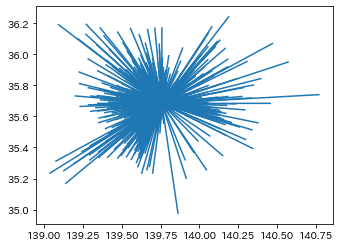

In [8]:
# 地図描写
df_OD_selected.plot()

In [9]:
# 必要なカラムを抽出
df_personTripOD2 = df_personTripOD[['S05b_003', 'S05b_004',  'S05b_010', 'S05b_035', 'geometry']]
df_personTripOD2.columns = ['zone01', 'zone02', 'trip_train', 'trip_all', 'geometry']
df_personTripOD2.head()

,zone01,zone02,trip_train,trip_all,geometry
0,0010,0010,1762,43416,"LINESTRING (139.75734421 35.68461018, 139.7570..."
1,0010,0011,3459,6019,"LINESTRING (139.74180474 35.68723724, 139.7570..."
2,0010,0012,4664,10995,"LINESTRING (139.7668389 35.69636092, 139.75704..."
3,0010,0013,3395,8045,"LINESTRING (139.75439777 35.67335735, 139.7570..."
4,0010,0020,1907,4496,"LINESTRING (139.78283768 35.68697357, 139.7570..."


In [10]:
# 起点と終点の緯度経度
df_personTripOD3 = df_personTripOD2.assign(
    lng_to=lambda df_personTripOD2: df_personTripOD2.apply(lambda row: row['geometry'].xy[0][0], axis=1) ,
    lng_from=lambda df_personTripOD2: df_personTripOD2.apply(lambda row: row['geometry'].xy[0][1], axis=1) ,
    lat_to=lambda df_personTripOD2: df_personTripOD2.apply(lambda row: row['geometry'].xy[1][0], axis=1) ,
    lat_from=lambda df_personTripOD2: df_personTripOD2.apply(lambda row: row['geometry'].xy[1][1], axis=1) 
)

In [11]:
df_personTripOD3.head()

,zone01,zone02,trip_train,trip_all,geometry,lng_to,lng_from,lat_to,lat_from
0,0010,0010,1762,43416,"LINESTRING (139.75734421 35.68461018, 139.7570...",139.757344,139.757044,35.684610,35.68431
1,0010,0011,3459,6019,"LINESTRING (139.74180474 35.68723724, 139.7570...",139.741805,139.757044,35.687237,35.68431
2,0010,0012,4664,10995,"LINESTRING (139.7668389 35.69636092, 139.75704...",139.766839,139.757044,35.696361,35.68431
3,0010,0013,3395,8045,"LINESTRING (139.75439777 35.67335735, 139.7570...",139.754398,139.757044,35.673357,35.68431
4,0010,0020,1907,4496,"LINESTRING (139.78283768 35.68697357, 139.7570...",139.782838,139.757044,35.686974,35.68431


## KeplerGL for Jupyter 

KeplerGLのJupyterウィジェット
https://github.com/keplergl/kepler.gl/tree/master/bindings/kepler.gl-jupyter

Kepler GL
https://kepler.gl/

In [12]:
from keplergl import KeplerGl

In [13]:
# 設定ファイルを読み込む
myconfig = open("KeplerGL_PersonTripOD_config.txt").read()

In [14]:
import ast

In [15]:
map_personTripOD_curve = KeplerGl(height=600, config=ast.literal_eval(myconfig))
map_personTripOD_curve.add_data(data=df_personTripOD3, name='personTripOD')
map_personTripOD_curve

User Guide: https://github.com/keplergl/kepler.gl/blob/master/docs/keplergl-jupyter/user-guide.md


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '4hj0mq', 'type': '…

In [16]:
map_personTripOD_curve.config

{'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '4hj0mq',
     'type': 'arc',
     'config': {'dataId': 'personTripOD',
      'label': 'personTripOD',
      'color': [225, 49, 106],
      'columns': {'lat0': 'lat_from',
       'lng0': 'lng_from',
       'lat1': 'lat_to',
       'lng1': 'lng_to'},
      'isVisible': True,
      'visConfig': {'opacity': 0.8,
       'thickness': 1,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'sizeRange': [0, 1],
       'targetColor': [207, 216, 244]},
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'sizeField': {'name': 

In [ ]:
# 設定ファイル
#config = map_personTripOD_curve.config
#with open("KeplerGL_PersonTripOD_config.txt", "w") as f:
#    print(config, file=f)

In [ ]:
# HTML に出力
map_personTripOD_curve.save_to_html(file_name="my_PersonTripOD_map.html")